<a href="https://colab.research.google.com/github/ayush9h/PyTorch-DeepLearning/blob/main/Sum_Calculator_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torch

In [9]:
N = 2000

data = torch.randint(-10,11,size = (N,2)).float()
print(data[:10])

tensor([[-2., -1.],
        [ 1., -8.],
        [ 3., -3.],
        [10.,  6.],
        [10.,  1.],
        [-2.,  6.],
        [ 1.,  4.],
        [ 2.,  6.],
        [-9.,  8.],
        [ 0.,  2.]])


In [4]:
labels = torch.sum(data,dim=1, keepdim=True)

In [10]:
# Few examples of training data
for i in range(1,10):
  print(data[i], labels[i])

tensor([ 1., -8.]) tensor([-6.])
tensor([ 3., -3.]) tensor([-6.])
tensor([10.,  6.]) tensor([10.])
tensor([10.,  1.]) tensor([-7.])
tensor([-2.,  6.]) tensor([8.])
tensor([1., 4.]) tensor([1.])
tensor([2., 6.]) tensor([-8.])
tensor([-9.,  8.]) tensor([-1.])
tensor([0., 2.]) tensor([-1.])


In [12]:
def ADDModel():
  addnums = nn.Sequential(
      nn.Linear(2,30), # Reason for 2 is that the data generated consists of 2 columns
      nn.ReLU(),
      nn.Linear(30,1),
      nn.ReLU(),
      nn.Linear(1,1)
  )
  loss_fn = nn.MSELoss()

  optimizer = torch.optim.Adam(addnums.parameters(), lr=0.01)
  return addnums, loss_fn, optimizer

In [13]:
nepochs = 10

In [16]:
def trainsum(ADDModel):
  losses = torch.zeros(nepochs)
  for epoch in range(nepochs):
    numloss = []
    for num,ans in zip(data, labels):
      yHat = ADDModel(num)
      loss = lossfun(yHat, ans)
      numloss.append(loss.item())

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
  losses[epoch] = np.mean(numloss)

  with torch.no_grad():
    predictions = ADDModel(data)

  trainacc = 100*torch.mean( (np.abs(predictions-labels)<1).float() )

  TESTdata = torch.randint(low=-10,high=11,size=(N,2)).float()
  TESTlabels = torch.sum(TESTdata,axis=1,keepdim=True)

  with torch.no_grad():
    predictions = ADDModel(TESTdata)
  testacc = 100*torch.mean( (np.abs(predictions-TESTlabels)<1).float() )

  return losses,trainacc,testacc,ADDModel

In [17]:
AddingMachine,lossfun,optimizer = ADDModel()
losses,trainacc,testacc,ADDmodel = trainsum(AddingMachine)


trainacc, testacc

/tmp/ipython-input-3527453517.py:18: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  trainacc = 100*torch.mean( (np.abs(predictions-labels)<1).float() )
/tmp/ipython-input-3527453517.py:25: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  testacc = 100*torch.mean( (np.abs(predictions-TESTlabels)<1).float() )


(tensor(9.0500), tensor(10.4500))

In [18]:
for i in range(10):
  AddingMachine,lossfun,optimizer = ADDModel()
  _,trainacc,testacc,ADDmodel = trainsum(AddingMachine)

  print('Model instance %s, final TRAIN/TEST accuracies: %g%%, %g%%' %(i+1,trainacc,testacc))


/tmp/ipython-input-3527453517.py:18: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  trainacc = 100*torch.mean( (np.abs(predictions-labels)<1).float() )
/tmp/ipython-input-3527453517.py:25: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  testacc = 100*torch.mean( (np.abs(predictions-TESTlabels)<1).float() )


Model instance 1, final TRAIN/TEST accuracies: 9.05%, 9%
Model instance 2, final TRAIN/TEST accuracies: 9.05%, 10.05%
Model instance 3, final TRAIN/TEST accuracies: 9.05%, 9.1%
Model instance 4, final TRAIN/TEST accuracies: 9.05%, 9.2%
Model instance 5, final TRAIN/TEST accuracies: 9.05%, 10.25%
Model instance 6, final TRAIN/TEST accuracies: 9.05%, 9.1%
Model instance 7, final TRAIN/TEST accuracies: 9.05%, 9.8%
Model instance 8, final TRAIN/TEST accuracies: 9.05%, 9.35%
Model instance 9, final TRAIN/TEST accuracies: 9.05%, 8.85%
Model instance 10, final TRAIN/TEST accuracies: 9.05%, 9.9%


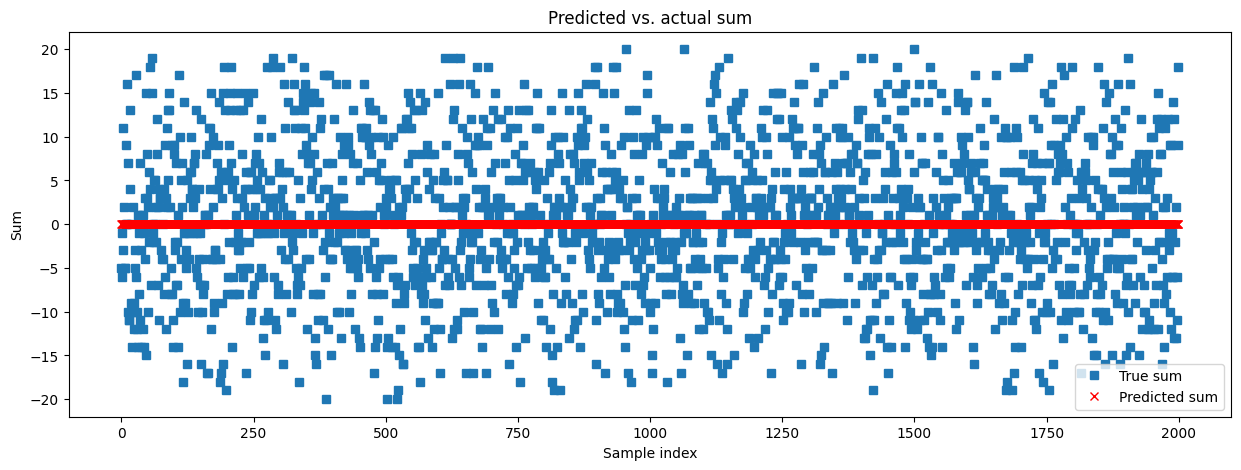

In [20]:
data = torch.randint(-10,11, size=(N,2)).float()
labels = torch.sum(data,dim = 1, keepdim = True)

with torch.no_grad():
  predictions = ADDmodel(data)

fig = plt.figure(figsize=(15,5))
plt.plot(labels,'s')
plt.plot(np.round(predictions.detach()),'rx')
plt.legend(['True sum','Predicted sum'])
plt.xlabel('Sample index')
plt.ylabel('Sum')
plt.title('Predicted vs. actual sum')
plt.show()
